#### 结点特征对比

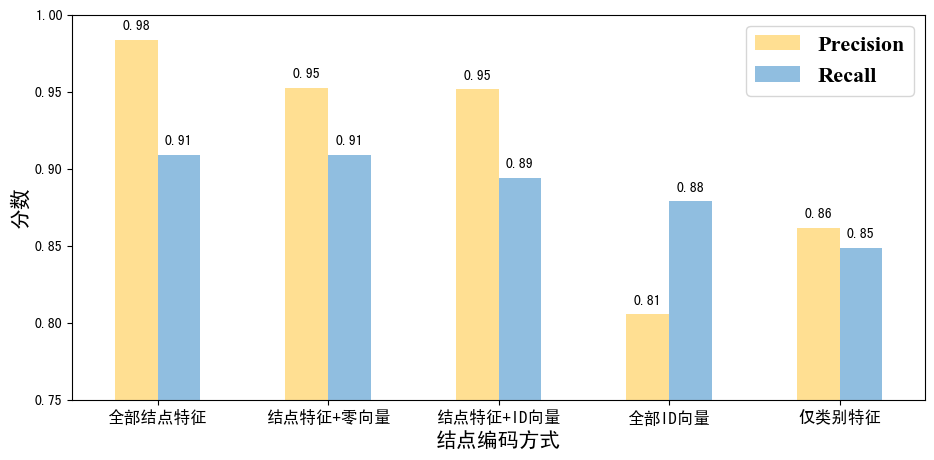

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# 设置中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.rcParams['font.weight'] = 'bold'
# plt.style.use('ggplot')
def generate_classification_report(feats_path):
    # Load the dataset
    dataset = np.load(feats_path)
    
    # Extract true labels and predicted probabilities
    y_true, y_pred = dataset['label'], dataset['prob']
    
    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate the classification report
    report = classification_report(y_true, y_pred, zero_division=0, output_dict=True, target_names=["Non-TF", "TF"])
    
    # Convert the classification report to a DataFrame
    report_df = pd.DataFrame(report)
    
    return report_df

result_list = []
for feats in range(5):
    result_list.append(generate_classification_report(f"../output/node_feat/feats{feats}.npz"))
# Extract F1-score and Recall for each class from the result_list
f1_scores = [result['TF']['precision'] for result in result_list]
recalls = [result['TF']['recall'] for result in result_list]

# Define custom index descriptions
index_descriptions = [
'全部结点特征',
'结点特征+零向量',
'结点特征+ID向量',
'全部ID向量',
'仅类别特征',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': f1_scores, 'Recall': recalls}, index=index_descriptions)
# Define custom colors
colors = [(255, 223, 146), (144, 190, 224)]
# Normalize the RGB values to [0, 1] since Matplotlib uses this range for RGB values
custom_colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]
# Plotting
ax = plot_data.plot(kind='bar', rot=0, color=custom_colors, figsize=(11, 5))
ax.set_ylim(0.75, 1)
ax.set_ylabel('分数', size=15)
ax.set_xlabel('结点编码方式', size=15)

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(prop={'family': 'Times New Roman', 'size': 16})
plt.savefig("plot/attribute-1.png", dpi=600, bbox_inches = 'tight')
plt.show()

#### 结点特征对比

In [2]:
node_feat_result = []
node_feat_result.append(generate_classification_report("../output/node_feat/feats5.npz"))
node_feat_result.append(generate_classification_report("../output/node_feat/feats1.npz"))
node_feat_result.append(generate_classification_report("../output/node_feat/feats0.npz"))

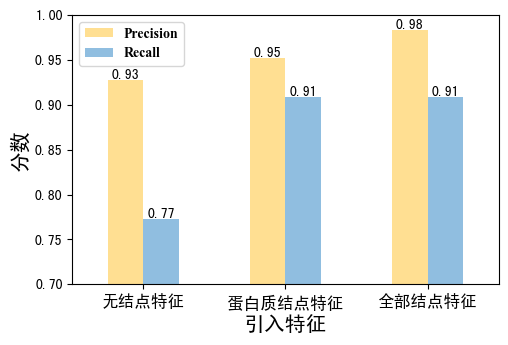

In [3]:
result_list = []
precision = [result['TF']['precision'] for result in node_feat_result]
recalls = [result['TF']['recall'] for result in node_feat_result]

# Define custom index descriptions
index_descriptions = [
'无结点特征',
'蛋白质结点特征',
'全部结点特征',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': precision, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, color=custom_colors, figsize=(5.5, 3.5))
ax.set_ylim(0.7, 1)
ax.set_ylabel('分数', size=15)
ax.set_xlabel('引入特征', size=15)

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.01),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(prop={'family': 'Times New Roman', 'size': 10})
plt.savefig("plot/attribute-2.png", dpi=600, bbox_inches = 'tight')
plt.show()

#### 边特征对比

In [4]:
node_feat_result = []
node_feat_result.append(generate_classification_report("../output/total node embedding.npz"))
node_feat_result.append(generate_classification_report("../output/FM-HGN.npz"))

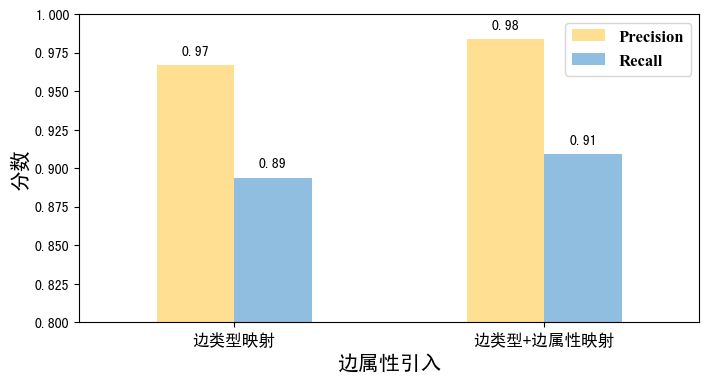

In [5]:
result_list = []
precision = [result['TF']['precision'] for result in node_feat_result]
recalls = [result['TF']['recall'] for result in node_feat_result]

# Define custom index descriptions
index_descriptions = [
'边类型映射',
'边类型+边属性映射',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': precision, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, color=custom_colors, figsize=(8, 4))
ax.set_ylim(0.8, 1)
ax.set_ylabel('分数', size=15)
ax.set_xlabel('边属性引入', size=15)

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
ax.tick_params(axis='x', labelsize=12)
# Display the plot
plt.legend(prop={'family': 'Times New Roman', 'size': 12})
plt.savefig("plot/attribute-3.png", dpi=300, bbox_inches = 'tight')
plt.show()

#### 损失函数对比

In [6]:
node_feat_result = []
node_feat_result.append(generate_classification_report("../output/loss/loss_normal.npz"))
node_feat_result.append(generate_classification_report("../output/FM-HGN.npz"))
node_feat_result.append(generate_classification_report("../output/loss/loss_focal.npz"))

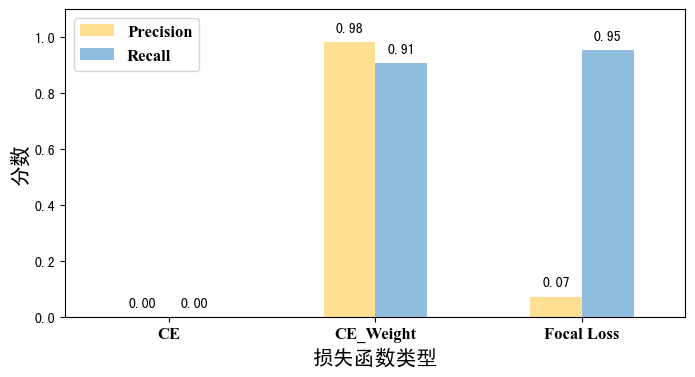

In [7]:
result_list = []
precision = [result['TF']['precision'] for result in node_feat_result]
recalls = [result['TF']['recall'] for result in node_feat_result]

# Define custom index descriptions
index_descriptions = [
'CE',
'CE_Weight',
'Focal Loss',
]

# Create a DataFrame for plotting with custom index descriptions
plot_data = pd.DataFrame({'Precision': precision, 'Recall': recalls}, index=index_descriptions)

# Plotting
ax = plot_data.plot(kind='bar', rot=0, color=custom_colors, figsize=(8, 4))
ax.set_ylim(0., 1.1)
ax.set_ylabel('分数', size=15)
ax.set_xlabel('损失函数类型', size=15)

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Customize font size for index labels
for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_fontname('Times New Roman')
# Display the plot
plt.legend(prop={'family': 'Times New Roman', 'size': 12})
plt.savefig("plot/attribute-4.png", dpi=300, bbox_inches = 'tight')
plt.show()